# ECE-221710405015-M.Karthik

In [1]:
# importing the packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
# reading the data set using the link 
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv",sep=",")
data.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


# 1. What programming languages and technologies are required at Amazon from the above list?(using BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns)

In [3]:
# creating a list of all the languages
languages = ['swift','matlab','mongodb','hadoop','cosmos', 
             'mysql','spark', 'pig', 'python', 'java', 'c++', 
             'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [4]:
# Combining the basic qualification and the prefferred qualifications into a list
qualifications = data['BASIC QUALIFICATIONS'].tolist()+data['PREFERRED QUALIFICATIONS'].tolist()
qualifications_s = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()

In [5]:
wordcount = dict((x,0) for x in languages)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_s):
    if w in wordcount:
        wordcount[w] += 1
print(wordcount)

C:\Users\karthik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


{'swift': 56, 'matlab': 24, 'mongodb': 19, 'hadoop': 219, 'cosmos': 1, 'mysql': 74, 'spark': 148, 'pig': 13, 'python': 1187, 'java': 3065, 'c++': 1892, 'php': 60, 'javascript': 832, 'objectivec': 55, 'ruby': 570, 'perl': 529, 'c': 1010, 'c#': 991}


In [6]:
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

# 2. Programming Languages Popularity at Amazon: Extract the count of each programming language and visualize it through a bar plot


In [7]:
# make a new dataframe from programming languages and their popularity
popular_programming = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
popular_programming =popular_programming[::-1]

In [8]:
popular_programming

,Language,Popularity
17,cosmos,1
16,pig,13
15,mongodb,19
14,matlab,24
13,objectivec,55
12,swift,56
11,php,60
10,mysql,74
9,spark,148
8,hadoop,219


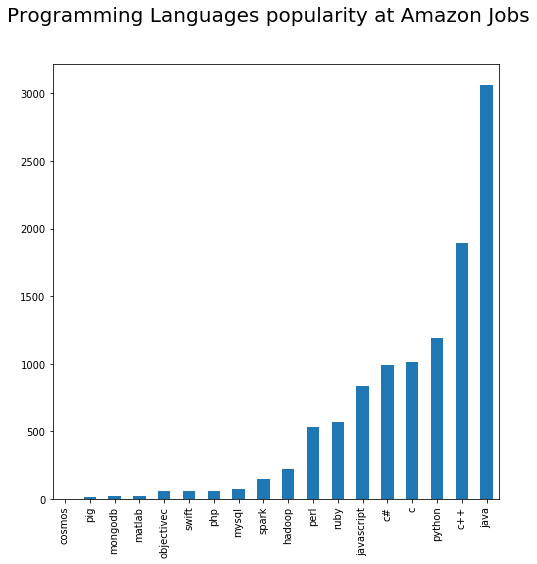

In [9]:
popular_programming.plot.bar(x='Language',y='Popularity',figsize=(8,8), legend=False,)
plt.suptitle("Programming Languages popularity at Amazon Jobs", fontsize=20)
plt.xlabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 3.Visualize the job locations through a plot.(Consider only the locations which are repeating more than 10 times)


In [10]:
threshold = 10
location_value_counts = data.location.value_counts()
to_remove = location_value_counts[location_value_counts <= threshold].index
data['location'].replace(to_remove, np.nan, inplace=True)
location_value_counts = data.location.value_counts()
location_value_counts = location_value_counts[::-1]

In [11]:
data.location.value_counts()

US, WA, Seattle            1856
US, CA, Sunnyvale           160
US, CA, Palo Alto           135
US, MA, Cambridge           118
CA, BC, Vancouver           113
US, CA, East Palo Alto       99
US, CA, Cupertino            90
IN, KA, Bangalore            66
US, WA, Bellevue             57
US, TX, Austin               52
IE, DUBLIN, Dublin           50
US, VA, Herndon              41
US, NY, New York             38
US, CA, San Francisco        38
IN, TS, Hyderabad            36
IN, TN, Chennai              33
CA, ON, Toronto              29
PL, Gdansk                   23
US, CA, Irvine               22
US, CA, Santa Monica         21
UK, London                   21
DE, Berlin                   20
IL, Haifa                    20
UK, Cambridge                19
US, NJ, Newark               19
CN, Beijing                  18
ZA, Cape Town                17
US, CA, San Diego            15
US, CA, Santa Cruz           15
ES, Madrid                   14
US, OR, Portland             14
RO, Iasi

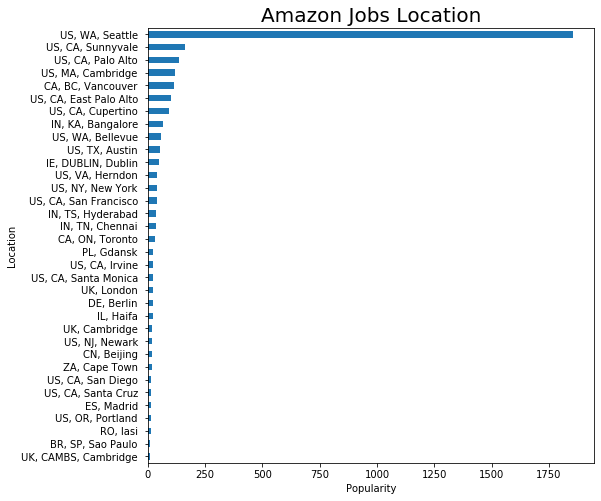

In [12]:
location_value_counts.plot.barh(figsize=(8,8))
plt.title("Amazon Jobs Location",fontsize=20)
plt.xlabel("Popularity", fontsize=10)
plt.ylabel("Location",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 4.degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]
 Popularity of Academic Degree at Amazon : Which degrees are most asked at Amazon from the above degree_list?
 Make a plot to visualize Degree and its Popularity


In [13]:
basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [14]:
degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]

In [15]:
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", basic_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
print(wordcount)

{'BA': 2, 'BS': 524, "Bachelor's": 947, 'PhD': 489, 'MS': 433, "Master's": 417}


In [16]:
degree_wanted = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [17]:
degree_popular = pd.DataFrame(degree_wanted,columns=['Degree','Popularity'])
degree_popular

,Degree,Popularity
0,Bachelor's,947
1,BS,524
2,PhD,489
3,MS,433
4,Master's,417
5,BA,2


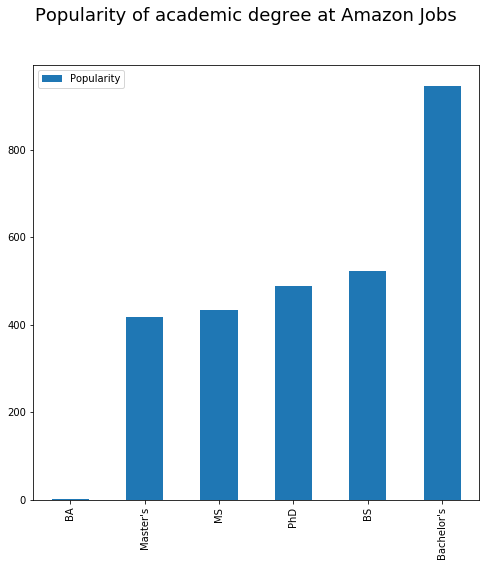

In [18]:
degree_popular =degree_popular[::-1] 
degree_popular.plot.bar(x='Degree',y='Popularity',figsize=(8,8), stacked=True)
plt.suptitle("Popularity of academic degree at Amazon Jobs ", fontsize=18)
plt.xlabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()